# 2021년도 지역별 국민연금 가입자 변동률을 분석해보자.

In [1]:
#필요한 라이브러리 읽어오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc

path = "c:/windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

## 1. 첨부된 화일을 이용하여 주피터에서 읽어오세요.
#### 첨부화일명 : 2021_지역별·종별_가입자_변동_현황.xlsx
#### 자료제공 : https://kosis.kr/statisticsList/statisticsListIndex.do?vwcd=MT_ZTITLE&menuId=M_01_01#content-group 
#### (통계청->복지->국민연금통계 ﻿자료)

In [2]:
국민연금 = pd.read_excel("./2021_지역별·종별_가입자_변동_현황.xlsx")
국민연금

,지역별,전체_전년도말(A) (명),전체_취득(B) (명),전체_상실(C) (명),사업장_전년도말(A) (명),사업장_취득(B) (명),사업장_상실(C) (명),지역_전년도말(A) (명),지역_취득(B) (명),지역_상실(C) (명)
0,합계,19009014,9643953,9385736,14320025,8218463,7956909,3800104,919507,973404
1,서울,5313427,2566489,2450203,4421160,2269868,2170619,703987,193946,184537
2,부산,1004022,506027,502255,717298,418580,410495,233239,53553,61572
3,대구,695783,331161,327962,479830,272417,264436,173051,35655,41423
4,인천,891143,491231,469734,626121,401675,382924,219846,61051,60663
5,광주,433762,220203,214992,304725,182641,176849,104814,24502,26429
6,대전,507109,239867,239240,379607,199149,198424,101236,26716,28383
7,울산,373126,185193,184761,279330,157526,156749,78029,18423,20094
8,세종,97399,65127,61204,69642,56710,53012,21501,5179,5461
9,경기,4661454,2490596,2382097,3445658,2101121,2012817,991754,254671,252599


## 2. 다음의  공식과  2021년도 전체, 사업장가입자, 지역가입자의 변동률을 numpy의 arary를 이용하여 각각 계산하세요. 
#### 변동률 = (취득(B) + 상실(C)) / 전년도말(A) × 100

#### * 참고 : 전체_ : 2021년도 국민연금 가입자 전체를  (예: 사업장_상실(C) (명) => 2020년도 사업장가입자의 국민연급 상실 인원수)
#### 사업자_ : 2021년도 사업장가입자를 의미함
#### 지역_ : 2021년도 지역가입자를 의미함

In [3]:
전체_변동률 = (국민연금['전체_취득(B) (명)'] + 국민연금['전체_상실(C) (명)']) / 국민연금['전체_전년도말(A) (명)'] * 100
사업자_변동률 = (국민연금['사업장_취득(B) (명)'] + 국민연금['사업장_상실(C) (명)']) / 국민연금['사업장_전년도말(A) (명)'] * 100
지역_변동률 = (국민연금['지역_취득(B) (명)'] + 국민연금['지역_상실(C) (명)']) / 국민연금['지역_전년도말(A) (명)'] * 100

## 3. pandas 를 이용하여 지역과 3개의 변동률을 이용하여 새로운 정형 데이터를 생성하세요.


In [4]:
변동률 = pd.DataFrame({'지역별': 국민연금['지역별'],'전체': 전체_변동률, '사업자': 사업자_변동률, '지역': 지역_변동률})
변동률

,지역별,전체,사업자,지역
0,합계,100.108764,112.956311,49.812084
1,서울,94.415374,100.437148,53.762783
2,부산,100.424293,115.583063,49.359241
3,대구,94.731116,111.884001,44.540627
4,인천,107.835106,125.311082,55.363300
5,광주,100.330365,117.971942,48.591791
6,대전,94.478110,104.732789,54.426291
7,울산,99.149885,112.510292,49.362417
8,세종,129.704617,157.551478,49.486070
9,경기,104.531612,119.394844,51.148773


## 4. 각 지역에 따른  전체_변동율, 사업장_변동율, 지역_변동율을 이용하여 라인차트(꺽은선형차트)로 시각화하여 분석하세요.
### (차트제목, label 등 추가적인 옵션들을 지정하세요.)

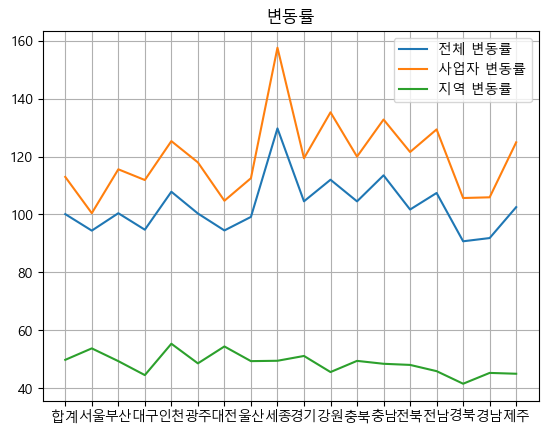

In [5]:
plt.plot(변동률['지역별'], 변동률['전체'],label='전체 변동률')
plt.plot(변동률['지역별'], 변동률['사업자'],label='사업자 변동률')
plt.plot(변동률['지역별'], 변동률['지역'],label='지역 변동률')
plt.title('변동률')
plt.legend()
plt.grid()
plt.show()

## 5. 각 지역별 전체 변동률을 Pie chart(원형차트)로 시각화하여 분석하세요.
#### (지역이름과 값을 표시하세요.)

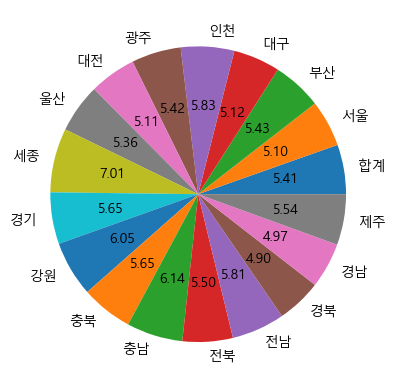

In [6]:
plt.pie(변동률['전체'], labels=변동률['지역별'], autopct="%.2f")
plt.show()

## 6. 저장시 화일명은 다음과 같이 지정하세요.
### 화일명 : 학번_이름_3주차.ipynb